## Task 3:To Explore the Decision tree Algorithm

For the given 'iris' dataset, create the decision tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier,it will be able to predict the right class accordingly.

In [1]:
##Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
dt = pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
print(dt)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [4]:
iris=datasets.load_iris()
dt=pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
dt.reset_index(inplace=True)
##Printing the dataset shape
print("Datset Length",len(dt))
print("Dataset shape",dt.shape)
print("Dataset:",dt.head())
  

Datset Length 150
Dataset shape (150, 5)
Dataset:    index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      0                5.1               3.5                1.4   
1      0                4.9               3.0                1.4   
2      0                4.7               3.2                1.3   
3      0                4.6               3.1                1.5   
4      0                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  


In [5]:
#to perform splitting of data into test and train
x=dt.values[:,1:4]
y=dt.values[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    

In [6]:
#to perform training with giniIndex
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(x_train,y_train)
y_pred=clf_gini.predict(x_test)
print("Confusion_Matrics:",confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion_Matrics: [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy Score: 0.9555555555555556
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [7]:
#to build model on training data
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
    
##performing training
clf_entropy.fit(x_train,y_train)
#to classify by entropy
y_pred=clf_entropy.predict(x_test)
print("Confusion_Matrics:",confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion_Matrics: [[16  0  0]
 [ 0 10  1]
 [ 0  0 18]]
Accuracy Score: 0.9777777777777777
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.91      0.95        11
         2.0       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



#### For Gini:
our accuracy is 0.9555 means our model is 95.55% accurate. In precision,High Precision means that false positive rate is low we have got 0.94 precision which is good. we got recall as 0.94 which is very good for this model as it is the above range of 0.5. f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision. In our case accuracy score and f1 score not differ much,f1 score is 0.96

#### For Entropy:
our accuracy is 0.9777~=0.98 means our model is 98% accurate. In precision,High Precision means that false positive rate is low we have got 0.95 precision which is good. we got recall as 0.91 which is very good for this model as it is the above range of 0.5. f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision. In our case accuracy score and f1 score not differ much,f1 score is 0.98

#### Desicion tree By Entropy

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.75\nentropy = 0.993\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 5.15\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 5.15\nentropy = 0.581\nsamples = 36\nvalue = [0, 5, 31]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21]')]

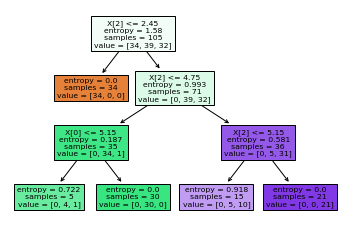

In [14]:
from sklearn import tree
tree.plot_tree(clf_entropy,filled=True)

#### Desicion tree By Gini Impurity

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.75\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 5.15\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.239\nsamples = 36\nvalue = [0, 5, 31]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(292.95, 27.180000000000007, 'gini = 0.069\nsamples = 28\nvalue = [0, 1, 27]')]

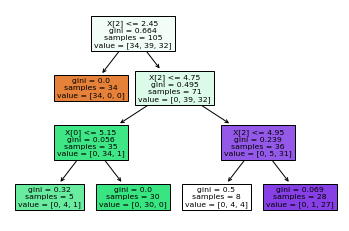

In [15]:
tree.plot_tree(clf_gini,filled=True)